<a href="https://colab.research.google.com/github/gokul-srinath/Machine-Learning/blob/master/Mnist_Digit_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import keras
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import cv2
import seaborn as sns

In [54]:
mnist_data=pd.read_csv("sample_data/mnist_train_small.csv")
X=mnist_data.iloc[:,1:]
y=mnist_data.iloc[:,0]

In [55]:
X.head(5)

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,0.39,...,0.551,0.552,0.553,0.554,0.555,0.556,0.557,0.558,0.559,0.560,0.561,0.562,0.563,0.564,0.565,0.566,0.567,0.568,0.569,0.570,0.571,0.572,0.573,0.574,0.575,0.576,0.577,0.578,0.579,0.580,0.581,0.582,0.583,0.584,0.585,0.586,0.587,0.588,0.589,0.590
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


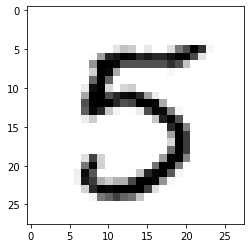

In [56]:
plt.imshow(np.array(X.iloc[0]).reshape(28,28),cmap="gray_r")

In [61]:
X=np.array(X)
y=np.array(y)

In [60]:
X=X.reshape(-1,28,28)

In [66]:
X=X.astype("float32")
X/=255.0

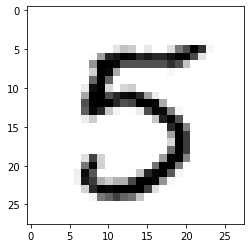

In [68]:
plt.imshow(np.array(X[0]).reshape(28,28),cmap="gray_r")

In [70]:
model=keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=X[0].shape))
model.add(keras.layers.Dense(128))
model.add(keras.layers.Activation("relu"))
model.add(keras.layers.Dense(128))
model.add(keras.layers.Activation("relu"))
model.add(keras.layers.Dense(10))
model.add(keras.layers.Activation("softmax"))

In [71]:
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [83]:
model.fit(x=X,y=y,epochs=10,batch_size=32,validation_split=0.3)

Train on 13999 samples, validate on 6000 samples
Epoch 1/10
13999/13999 [==============================] - 2s 124us/step - loss: 0.0233 - accuracy: 0.9919 - val_loss: 0.0152 - val_accuracy: 0.9945
Epoch 2/10
13999/13999 [==============================] - 2s 120us/step - loss: 0.0068 - accuracy: 0.9982 - val_loss: 0.0089 - val_accuracy: 0.9973
Epoch 3/10
13999/13999 [==============================] - 2s 122us/step - loss: 0.0115 - accuracy: 0.9960 - val_loss: 0.0182 - val_accuracy: 0.9945
Epoch 4/10
13999/13999 [==============================] - 2s 126us/step - loss: 0.0066 - accuracy: 0.9981 - val_loss: 0.0130 - val_accuracy: 0.9960
Epoch 5/10
13999/13999 [==============================] - 2s 121us/step - loss: 0.0097 - accuracy: 0.9972 - val_loss: 0.0388 - val_accuracy: 0.9870
Epoch 6/10
13999/13999 [==============================] - 2s 122us/step - loss: 0.0245 - accuracy: 0.9921 - val_loss: 0.0421 - val_accuracy: 0.9867
Epoch 7/10
13999/13999 [==============================] - 2s 12

In [82]:
for i in range(10):
  print(i,':',(y==i).sum())

0 : 1962
1 : 2243
2 : 1989
3 : 2021
4 : 1924
5 : 1761
6 : 2038
7 : 2126
8 : 1912
9 : 2023


In [84]:
Test_data=pd.read_csv("sample_data/mnist_test.csv")

In [85]:
X_test=np.array(Test_data.iloc[:,1:]).reshape(-1,28,28)
y_test=np.array(Test_data.iloc[:,0])

In [86]:
model.evaluate(X_test,y_test)

9999/9999 [==============================] - 0s 38us/step


[31.944186249069244, 0.9749975204467773]